# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff y Felipe Tobar  

**Fecha:** 29 noviembre, 2019

# Módulo 8 - Aplicación de SVM

In [2]:
import numpy as np
import pandas as pd
import missingno

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [3]:
#df = pd.read_excel('../Taller 1 Machine Learning BE SICNEW.xlsx')
#df.head(5)
#df.to_csv('clientes.csv', index_label=False)

## Cargar y limpiar

In [4]:
df0 = pd.read_csv('clientes.csv', low_memory=False)
df0.info()
df0.head(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164824 entries, 0 to 164823
Data columns (total 90 columns):
Id                     164824 non-null int64
sexo                   125648 non-null float64
edad                   125648 non-null float64
est_civil              125648 non-null float64
comuna                 85360 non-null float64
region                 125648 non-null float64
act_eco_cod            125648 non-null float64
act_eco_des            125648 non-null object
sec_cod                125648 non-null float64
sec_des                125648 non-null object
DDVI                   125648 non-null float64
DM                     118528 non-null float64
DDVE                   118528 non-null float64
DDC                    118528 non-null float64
DIVI                   118528 non-null float64
DIVE                   118528 non-null float64
LC_disp                118528 non-null float64
dem_dct_hip            118528 non-null float64
DDVI1                  111188 non-null float64
D

,Id,sexo,edad,est_civil,comuna,region,act_eco_cod,act_eco_des,sec_cod,sec_des,DDVI,DM,DDVE,DDC,DIVI,DIVE,LC_disp,dem_dct_hip,DDVI1,DM1,DDVE1,DDC1,DIVI1,DIVE1,VFM_M1,DDVI2,DM2,DDVE2,DDC2,DIVI2,DIVE2,VFM_M2,DDVI3,DM3,DDVE3,DDC3,DIVI3,DIVE3,VFM_M3,DDVI4,DM4,DDVE4,DDC4,DIVI4,DIVE4,VFM_M4,DDVI5,DM5,DDVE5,DDC5,DIVI5,DIVE5,VFM_M5,DDVI6,DM6,DDVE6,DDC6,DIVI6,DIVE6,VFM_M6,dda_max,Vector_FM_Max,Vector_FM_Min,VFM_Max_Min,MPMA,MPMR,DPMA,DPMR,NPB30,MPB30,NPE3090,MPE3090,NPS90,MPS90,NA6M,MA6M,pro_sin_acl,inf_lab,Tipo_Cliente,nuevo_antiguo,Comportamiento_SBFI,Comportamiento_BEME,Perfil_Riesgo,mora_6m,var_deu,deuda_cons_com,PERIODO,CLASE,Prob_est_SICNEW,PTJE_SICNEW
0,1,0.0,84.0,0.0,NaN,0.0,0.0,S/I,0.0,S/I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SIN PRODUCTO,NUEVO_VIG,EXCELENTE,EXCELENTE,EXCELENTE,0.0,1.0,0.0,201001,0,0.041780,958.219614
1,2,0.0,81.0,0.0,NaN,0.0,0.0,S/I,0.0,S/I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,1.0,97.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO DEUDOR,NUEVO_VIG,EXCELENTE,EXCELENTE,EXCELENTE,0.0,2.0,0.0,201001,0,0.015100,984.900069
2,3,2.0,80.0,0.0,0.0,0.0,11123.0,Producción de leche,10.0,"AGRICULTURA, SERVICIOS AGRICOLAS, CAZA, SILVIC...",357.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,266.0,0.0,0.0,0.0,0.0,0.0,1.0,210.0,0.0,0.0,0.0,0.0,0.0,1.0,258.0,0.0,0.0,0.0,0.0,0.0,1.0,366.0,0.0,0.0,0.0,0.0,0.0,1.0,722.0,0.0,0.0,0.0,0.0,0.0,1.0,3165.0,0.0,0.0,0.0,0.0,0.0,1.0,3165.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEUDOR NO COMERCIAL,NUEVO_VIG,EXCELENTE,SIN COMPORTAMIENTO BEME (BUENO),EXCELENTE,0.0,2.0,357.0,201001,0,0.003401,996.599478
3,4,0.0,78.0,0.0,NaN,0.0,0.0,S/I,0.0,S/I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NUEVO_NUE,SIN COMPORTAMIENTO SF (REGULAR),EXCELENTE,EXCELENTE,0.0,2.0,0.0,201001,0,0.220814,779.186161
4,5,2.0,74.0,0.0,1.0,1.0,62570.0,Comercio al por menor no clasificado en otra p...,3.0,COMERCIO,102.0,0.0,0.0,0.0,0.0,0.0,678.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0,0.0,0.0,0.0,0.0,0.0,1.0,150.0,0.0,0.0,0.0,0.0,0.0,1.0,151.0,0.0,0.0,0.0,0.0,0.0,1.0,179.0,0.0,0.0,0.0,0.0,0.0,1.0,179.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NUEVO_NUE,EXCELENTE,EXCELENTE,EXCELENTE,0.0,2.0,102.0,201001,0,0.005062,994.937855
5,6,2.0,75.0,2.0,102.0,13.0,62161.0,Verdulerías,3.0,COMERCIO,1819.0,0.0,0.0,0.0,0.0,0.0,2333.0,0.0,1784.0,0.0,0.0,0.0,0.0,0.0,1.0,1807.0,0.0,0.0,0.0,0.0,0.0,1.0,1758.0,0.0,0.0,0.0,0.0,0.0,1.0,1815.0,0.0,0.0,0.0,0.0,0.0,1.0,1871.0,0.0,0.0,0.0,0.0,0.0,1.0,1926.0,0.0,0.0,0.0,0.0,0.0,1.0,1926.0,1.0,1.0,0.0,56290.0,56290.0,1164.0,1164.0,NaN,NaN,0.0,NaN,1.0,56290.0,0.0,NaN,2.0,0.0,SIN PRODUCTO,NUEVO_VIG,EXCELENTE,MALO,EXCELENTE,0.0,2.0,1819.0,201001,0,0.014002,985.998081
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201001,0,0.105600,NaN
7,8,0.0,75.0,1.0,NaN,0.0,0.0,S/I,0.0,S/I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Borrar columnas inutil y reemplazar NaNs con valores defectos

In [5]:
df1 = df0.copy()
for col in ['Id', 'sexo', 'edad', 'est_civil', 'comuna', 'PERIODO', 'Tipo_Cliente']:
    if col in df1.columns:
        del df1[col]

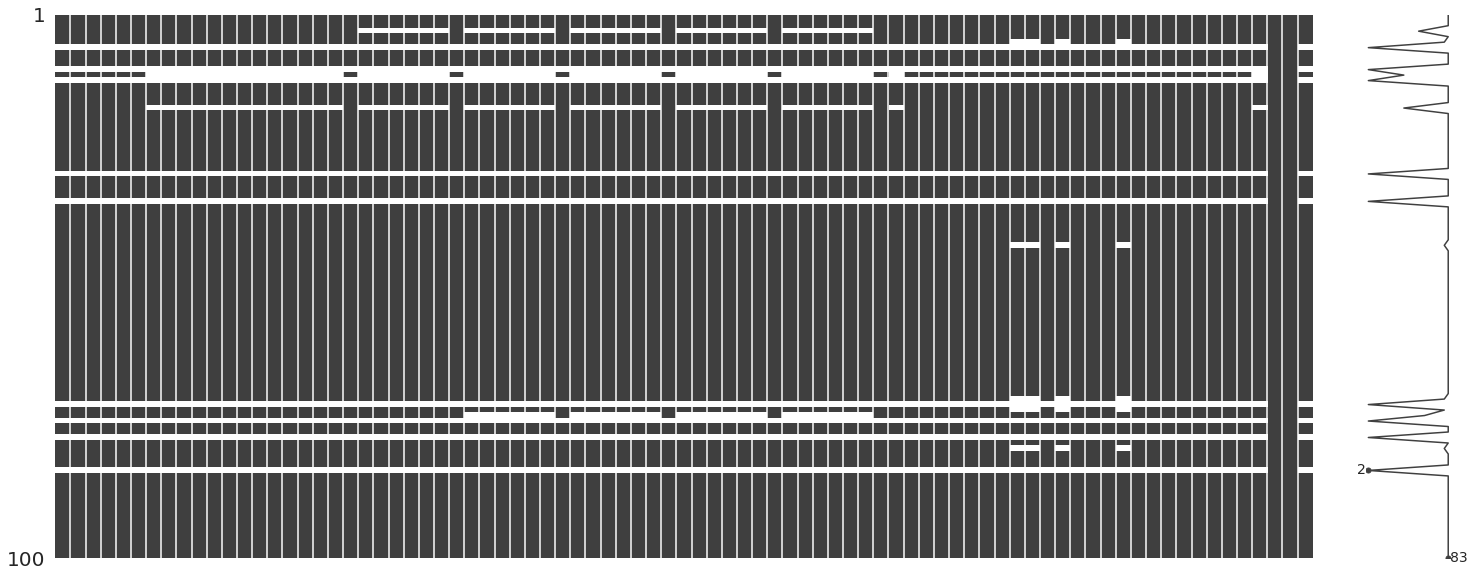

In [6]:
missingno.matrix(df1[:100]);

In [7]:
df2 = df1.copy()
df2.fillna({'NPB30':0, 'MPB30':0, 'MPE3090':0, 'MA6M':0}, inplace=True)

## Reemplazar clases con números

In [8]:
for col in df2.columns:
    if df2[col].dtype == np.object:
        valores = df2[col].unique()
        if len(valores) > 100:
            print('\n%s: más que 100 distintos valors' % (col))
        else:
            print('\n%s:' % (col), valores)


act_eco_des: más que 100 distintos valors

sec_des: ['S/I' 'AGRICULTURA, SERVICIOS AGRICOLAS, CAZA, SILVICULTURA Y PESCA'
 'COMERCIO' nan 'INDUSTRIAS MANUFACTURERAS'
 'TRANSPORTE, ALMACENAMIENTO Y COMUNICACIONES' 'CONSTRUCCION'
 'SERVICIOS ESTATALES, SOCIALES, PERSONALES E INTERNACIONALES'
 'MINAS, PETROLEO Y CANTERAS'
 'FINANZAS, SEGUROS, BIENES INMUEBLES Y SERVICIOS TECNICOS, PROFESIONALES Y OTROS'
 'IVIDADES NO ESPECIFICADAS Y OTRAS' 'ELECTRICIDAD, GAS Y AGUA']

nuevo_antiguo: ['NUEVO_VIG' 'NUEVO_NUE' nan]

Comportamiento_SBFI: ['EXCELENTE' 'SIN COMPORTAMIENTO SF (REGULAR)' nan 'BUENO' 'REGULAR'
 'MALO']

Comportamiento_BEME: ['EXCELENTE' 'SIN COMPORTAMIENTO BEME (BUENO)' 'MALO' nan 'REGULAR'
 'BUENO' 'SIN COMPORTAMIENTO BEME (REGULAR)']

Perfil_Riesgo: ['EXCELENTE' nan 'BUENO' 'REGULAR' 'MALO']


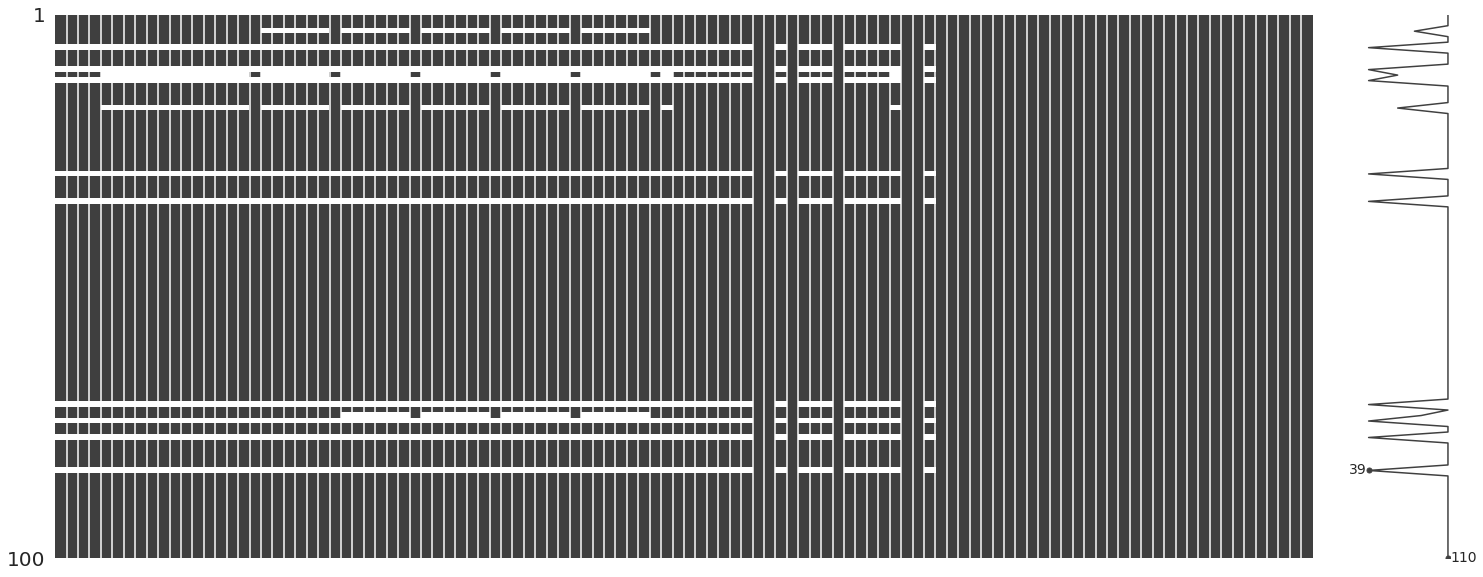

In [9]:
df3 = df2.copy()

# borrar columnas que no son categoricas o que tienen solo un valor distinto
for col in ['act_eco_des']:
    if col in df3.columns:
        del df3[col]

for col in ['sec_des', 'nuevo_antiguo', 'Comportamiento_SBFI', 'Comportamiento_BEME', 'Perfil_Riesgo']:
    encoded = pd.get_dummies(df3[col], prefix=col, dummy_na=True)
    df3 = pd.concat([df3, encoded], axis=1).drop(col, axis=1)

missingno.matrix(df3[:100]);

## Sacar filas con NaN

In [10]:
df4 = df3.copy()
df4 = df4.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105542 entries, 0 to 164795
Columns: 110 entries, region to Perfil_Riesgo_nan
dtypes: float64(76), int64(1), uint8(33)
memory usage: 66.1 MB


## Sacar columnas con todos los valores iguales

In [11]:
df5 = df4.copy()

for col in df5.columns:
    if df5[col].max()-df5[col].min() == 0:
        print('Columna %s tiene valores entre %f--%f' % (col, df5[col].min(), df5[col].max()))
        del df5[col]

Columna sec_des_nan tiene valores entre 0.000000--0.000000
Columna nuevo_antiguo_nan tiene valores entre 0.000000--0.000000
Columna Comportamiento_SBFI_SIN COMPORTAMIENTO SF (REGULAR) tiene valores entre 0.000000--0.000000
Columna Comportamiento_SBFI_nan tiene valores entre 0.000000--0.000000
Columna Comportamiento_BEME_nan tiene valores entre 0.000000--0.000000
Columna Perfil_Riesgo_nan tiene valores entre 0.000000--0.000000


## Distribucion de los datos

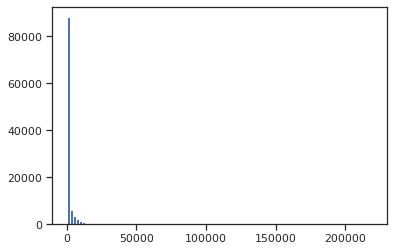

In [12]:
plt.hist(df5['DDVI'], bins=100);

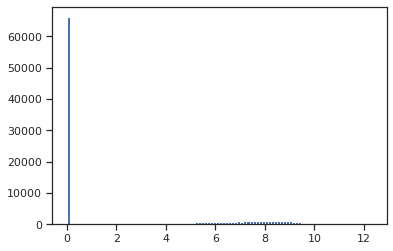

In [13]:
plt.hist(np.log(df5['DDVI']+1), bins=100);

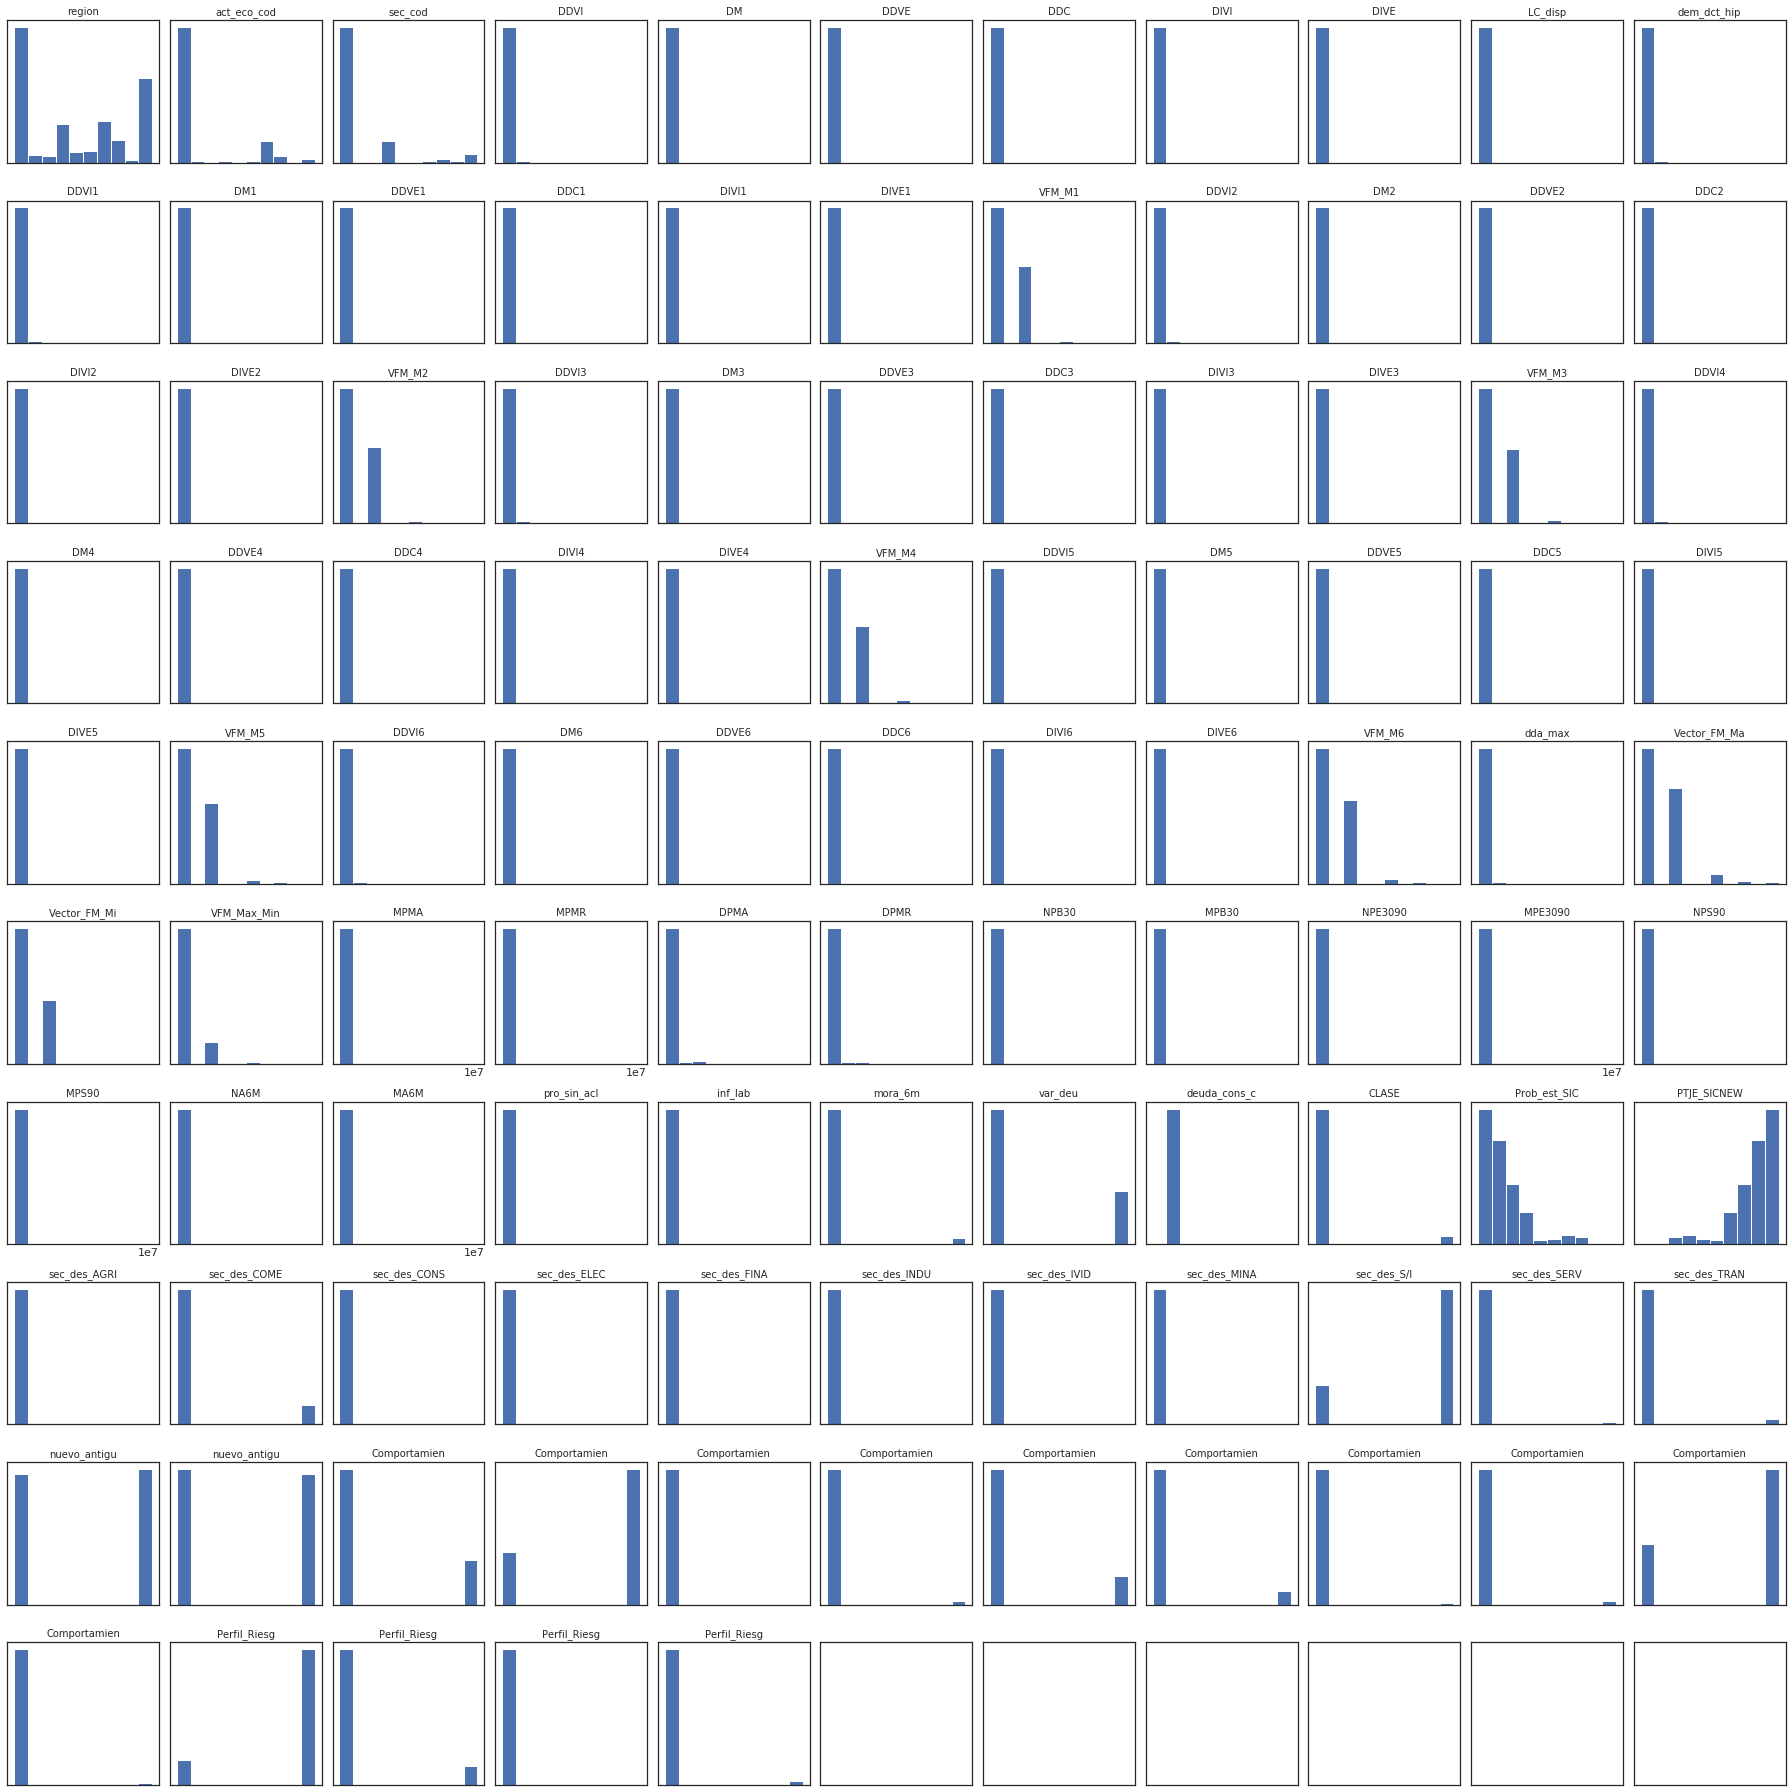

In [13]:
def plot_histograms(df):
    width = int(np.ceil(np.sqrt(len(df.columns))))
    height = int(np.ceil(len(df.columns) / width))
    fig, axes = plt.subplots(height, width, figsize=(25, 25), tight_layout=True)

    for j in range(height):
        for i in range(width):        
            ax = axes[j,i]
            col = j*width+i
            if col < len(df.columns):
                title = df.columns[col]
                if len(title) > 12:
                    title = title[:12]
                ax.set_title(title, fontdict={'fontsize': 10.0})
                
                data = df.iloc[:, col]
                ax.hist(data)            
            ax.tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

plot_histograms(df5)

In [14]:
df6 = df5.copy()

log_columns = ['DDVI','DM','DDVE','DDC','DDVI1','DM1','DDVE1','DDC1','DDVI2','DM2','DDVE2','DDC2','DDVI3',
               'DM3','DDVE3','DDC3','DDVI4','DM4','DDVE4','DDC4','DDVI5','DM5','DDVE5','DDC5','DDVI6','DM6',
               'DDVE6','DDC6','MPMA','MPMR','DPMA','DPMR','NPB30','MPB30','NPE3090','MPE3090','NPS90','MPS90',
               'NA6M','MA6M','pro_sin_acl','inf_lab']

columns_min = df6.min()
df6[log_columns] = np.log(df6[log_columns] - columns_min[log_columns] + 1)

def invert_log(df):
    columns = df.columns[df.columns.isin(log_columns)]
    df[columns] = np.exp(df[columns]) + columns_min[columns] - 1
    return df

In [ ]:
plot_histograms(df6)

## Normalización de los datos

In [15]:
df7 = df6.copy()

columns_min = df7.min()
columns_max = df7.max()
scale_columns = df7.columns
df7[scale_columns] = (df7[scale_columns] - columns_min[scale_columns])/(columns_max[scale_columns]-columns_min[scale_columns])

def invert_scale(df):
    columns = df.columns[df.columns.isin(scale_columns)]
    df[columns] = df[columns] * (columns_max[columns] - columns_min[columns]) + columns_min[columns]
    return df

df7.head(10)

,region,act_eco_cod,sec_cod,DDVI,DM,DDVE,DDC,DIVI,DIVE,LC_disp,dem_dct_hip,DDVI1,DM1,DDVE1,DDC1,DIVI1,DIVE1,VFM_M1,DDVI2,DM2,DDVE2,DDC2,DIVI2,DIVE2,VFM_M2,DDVI3,DM3,DDVE3,DDC3,DIVI3,DIVE3,VFM_M3,DDVI4,DM4,DDVE4,DDC4,DIVI4,DIVE4,VFM_M4,DDVI5,DM5,DDVE5,DDC5,DIVI5,DIVE5,VFM_M5,DDVI6,DM6,DDVE6,DDC6,DIVI6,DIVE6,VFM_M6,dda_max,Vector_FM_Max,Vector_FM_Min,VFM_Max_Min,MPMA,MPMR,DPMA,DPMR,NPB30,MPB30,NPE3090,MPE3090,NPS90,MPS90,NA6M,MA6M,pro_sin_acl,inf_lab,mora_6m,var_deu,deuda_cons_com,CLASE,Prob_est_SICNEW,PTJE_SICNEW,"sec_des_AGRICULTURA, SERVICIOS AGRICOLAS, CAZA, SILVICULTURA Y PESCA",sec_des_COMERCIO,sec_des_CONSTRUCCION,"sec_des_ELECTRICIDAD, GAS Y AGUA","sec_des_FINANZAS, SEGUROS, BIENES INMUEBLES Y SERVICIOS TECNICOS, PROFESIONALES Y OTROS",sec_des_INDUSTRIAS MANUFACTURERAS,sec_des_IVIDADES NO ESPECIFICADAS Y OTRAS,"sec_des_MINAS, PETROLEO Y CANTERAS",sec_des_S/I,"sec_des_SERVICIOS ESTATALES, SOCIALES, PERSONALES E INTERNACIONALES","sec_des_TRANSPORTE, ALMACENAMIENTO Y COMUNICACIONES",nuevo_antiguo_NUEVO_NUE,nuevo_antiguo_NUEVO_VIG,Comportamiento_SBFI_BUENO,Comportamiento_SBFI_EXCELENTE,Comportamiento_SBFI_MALO,Comportamiento_SBFI_REGULAR,Comportamiento_BEME_BUENO,Comportamiento_BEME_EXCELENTE,Comportamiento_BEME_MALO,Comportamiento_BEME_REGULAR,Comportamiento_BEME_SIN COMPORTAMIENTO BEME (BUENO),Comportamiento_BEME_SIN COMPORTAMIENTO BEME (REGULAR),Perfil_Riesgo_BUENO,Perfil_Riesgo_EXCELENTE,Perfil_Riesgo_MALO,Perfil_Riesgo_REGULAR
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.135209,0.0,0.138423,0.861577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.374675,0.0,0.0,0.0,0.0,0.0,0.25,0.000443,0.25,0.00,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.135209,0.0,0.047493,0.952507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.115874,1.0,0.478240,0.0,0.0,0.0,0.0,0.0,0.014895,0.0,0.454388,0.0,0.0,0.0,0.0,0.0,0.25,0.435499,0.0,0.0,0.0,0.0,0.0,0.25,0.453098,0.0,0.0,0.0,0.0,0.0,0.25,0.482502,0.0,0.0,0.0,0.0,0.0,0.25,0.537786,0.0,0.0,0.0,0.0,0.0,0.25,0.658667,0.0,0.0,0.0,0.0,0.0,0.25,0.014461,0.25,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.136620,0.0,0.007620,0.992380,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.076923,0.651825,0.3,0.376924,0.0,0.0,0.0,0.0,0.0,0.012138,0.0,0.379258,0.0,0.0,0.0,0.0,0.0,0.25,0.375548,0.0,0.0,0.0,0.0,0.0,0.25,0.367811,0.0,0.0,0.0,0.0,0.0,0.25,0.409941,0.0,0.0,0.0,0.0,0.0,0.25,0.410391,0.0,0.0,0.0,0.0,0.0,0.25,0.424359,0.0,0.0,0.0,0.0,0.0,0.25,0.000818,0.25,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.135612,0.0,0.013283,0.986717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.000000,0.647564,0.3,0.610480,0.0,0.0,0.0,0.0,0.0,0.041768,0.0,0.608901,0.0,0.0,0.0,0.0,0.0,0.25,0.610299,0.0,0.0,0.0,0.0,0.0,0.25,0.609300,0.0,0.0,0.0,0.0,0.0,0.25,0.613152,0.0,0.0,0.0,0.0,0.0,0.25,0.615500,0.0,0.0,0.0,0.0,0.0,0.25,0.618093,0.0,0.0,0.0,0.0,0.0,0.25,0.008800,0.25,0.25,0.00,0.611285,0.611285,0.897556,0.897556,0.0,0.0,0.0,0.0,0.160053,0.611285,0.0,0.0,0.254456,0.0,0.0,1.0,0.142397,0.0,0.043751

## Separar entre entradas y salidas, y entre datos para entrenar y para testear


In [16]:
def separate_data(df, output_features, test_size=0.30):
    single_output_feature = not isinstance(output_features, list)
    if single_output_feature:
        output_features = [output_features]
    
    input_features = df.columns[~df.columns.isin(output_features)]
    X = df[input_features]
    y = df[output_features]
    if single_output_feature:
        y = y.squeeze()
        
    if test_size > 0.0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    else:
        X_train = X
        y_train = y
        X_test = None
        y_test = None
    return X_train, X_test, y_train, y_test

## Aplicación de SVM

In [17]:
df = df7.copy()
#dfClase0 = df[df['CLASE'] == 0].sample(n=5718)
#dfClase1 = df[df['CLASE'] == 1]
#df = pd.concat([dfClase0, dfClase1])
df.info()

df['CLASE'] = df['CLASE'].astype(np.int64)

X_train, X_test, y_train, y_test = separate_data(df, 'CLASE', test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105542 entries, 0 to 164795
Columns: 104 entries, region to Perfil_Riesgo_REGULAR
dtypes: float64(104)
memory usage: 84.5 MB


In [18]:
from sklearn.svm import SVC, LinearSVC

clf = SVC(gamma=0.1, class_weight='balanced', kernel='rbf', C=1.0)
#clf = LinearSVC(class_weight='balanced')
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

## Regresión logística

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6948411541824541

In [21]:
y_pred = lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1726
           1       0.69      0.69      0.69      1705

    accuracy                           0.69      3431
   macro avg       0.69      0.69      0.69      3431
weighted avg       0.69      0.69      0.69      3431



## Red neuronal

In [41]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_in, n_out):
        super(Net, self).__init__()
        print("Input dimension:", n_in)
        print("Output dimension:", n_out)
        self.fc1 = torch.nn.Linear(n_in, 360)
        self.fc2 = torch.nn.Linear(360, 720)
        self.fc3 = torch.nn.Linear(720, 1440)
        self.fc4 = torch.nn.Linear(1440, 1440)
        self.fc5 = torch.nn.Linear(1440, 1440)
        self.fc6 = torch.nn.Linear(1440, 720)
        self.fc7 = torch.nn.Linear(720, 180)
        self.fc8 = torch.nn.Linear(180, 90)
        self.fc9 = torch.nn.Linear(90, 45)
        self.fc10 = torch.nn.Linear(45, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = self.fc10(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
n_in = len(X_train.columns)
n_out = 2 # two classes

modelo = Net(n_in, n_out).to(device)
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss().to(device)

X_train_tensor = torch.from_numpy(X_train.values).float().to(device)
y_train_tensor = torch.from_numpy(y_train.values).to(device)
X_test_tensor = torch.from_numpy(X_test.values).float().to(device)

dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=500)

losses = []
losses_test = []

Input dimension: 103
Output dimension: 2


[   2] loss_train: 28.77770001  loss_test: 0.05492215
[   4] loss_train: 28.61117838  loss_test: 0.05492215
[   6] loss_train: 28.10722631  loss_test: 0.05492215
[   8] loss_train: 27.93485084  loss_test: 0.05492215
[  10] loss_train: 27.82257135  loss_test: 0.05492215
[  12] loss_train: 27.73459296  loss_test: 0.05492215
[  14] loss_train: 27.90682359  loss_test: 0.05508006
[  16] loss_train: 27.96887642  loss_test: 0.05492215
[  18] loss_train: 27.57346086  loss_test: 0.05492215
[  20] loss_train: 28.98209210  loss_test: 0.05492215
[  22] loss_train: 28.47704219  loss_test: 0.05492215
[  24] loss_train: 28.43265854  loss_test: 0.05492215
[  26] loss_train: 28.02607759  loss_test: 0.05492215
[  28] loss_train: 27.64559694  loss_test: 0.05492215
[  30] loss_train: 27.62450735  loss_test: 0.05492215
[  32] loss_train: 27.68021345  loss_test: 0.05492215
[  34] loss_train: 27.52930744  loss_test: 0.05492215
[  36] loss_train: 27.55720355  loss_test: 0.05492215
[  38] loss_train: 27.614264

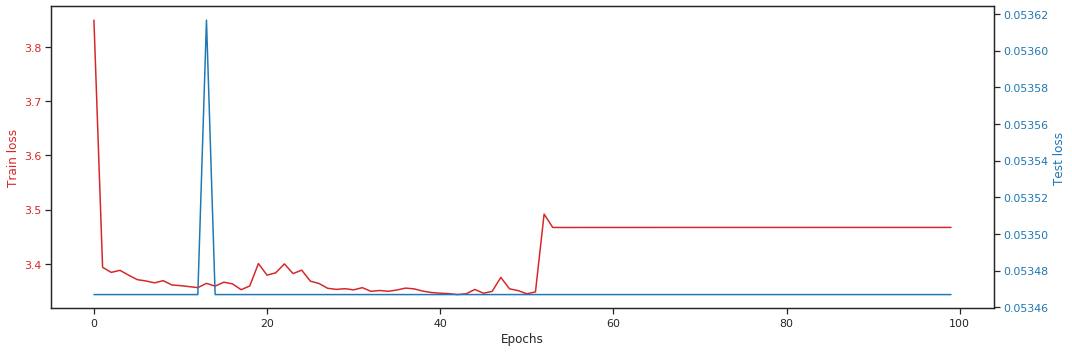

In [42]:
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        xs, ys = data
        
        modelo.zero_grad()

        outputs = modelo(xs)
                        
        loss = criterion(outputs, ys)
        loss.backward()        
        optimizer.step()
        
        running_loss += loss.item()
            
    y_test_pred = modelo(X_test_tensor).cpu().detach().numpy().argmax(1)
    loss_test = np.mean(abs(y_test_pred - y_test.values))
    
    if (epoch+1)%2 == 0:
        print('[%4d] loss_train: %.8f  loss_test: %.8f' % (epoch+1, running_loss, loss_test))
    losses.append(running_loss)    
    losses_test.append(loss_test)

print('Finished Training')

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:red'
ax1.set_ylabel('Train loss', color=color)
ax1.plot(np.log1p(losses), color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('Test loss', color=color)
ax2.plot(np.log1p(losses_test), color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xlabel('Epochs')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [43]:
y_pred = modelo(X_test_tensor).cpu().detach().numpy().argmax(1)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29924
           1       0.00      0.00      0.00      1739

    accuracy                           0.95     31663
   macro avg       0.47      0.50      0.49     31663
weighted avg       0.89      0.95      0.92     31663



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
